# Library Import

In [1]:
import numpy as np
import pandas as pd

import tensorflow as tf
from tensorflow.keras.optimizers import Adam

# 케라스에서 할 때 필요한 것
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

# Train / Test split  &  sclaer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, StandardScaler

import matplotlib.pyplot as plt

# Data

In [2]:
from sklearn.datasets import load_iris

In [3]:
iris = load_iris()
iris

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

## iris.keys()

In [4]:
iris.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename'])

In [6]:
print( iris[ 'DESCR'])

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

## Load

In [7]:
irisDF = pd.DataFrame( iris['data'])
irisDF.columns = iris['feature_names']
irisDF['species'] = iris['target']
irisDF

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


## One-hot encoding

### pd.get_dummies

In [9]:
pd.get_dummies( irisDF['species']).values

array([[1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0,

### TensorFlow에서 one-hot encoding

In [11]:
from tensorflow.keras.utils import to_categorical

In [13]:
iris['target']

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [14]:
to_categorical( iris['target'])

array([[1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0

# Quiz

```
1. Tensor
1) [5.1, 3.5, 1.4, 0.2] 종분류 예측
2) confusion matrix
3) 정확도
4) f1 score

2. Keras
1) [5.1, 3.5, 1.4, 0.2] 종분류 예측
2) confusion matrix
3) 정확도
4) f1 score
```

# Quiz ( Tensor version )

## x_data, y_data 생성

In [22]:
pd.get_dummies( irisDF['species'])

,0,1,2
0,1,0,0
1,1,0,0
2,1,0,0
3,1,0,0
4,1,0,0
...,...,...,...
145,0,0,1
146,0,0,1
147,0,0,1
148,0,0,1


In [23]:
x_data = irisDF.iloc[:, :-1]
y_data = pd.get_dummies( irisDF['species'])

In [24]:
x_data

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [25]:
y_data

,0,1,2
0,1,0,0
1,1,0,0
2,1,0,0
3,1,0,0
4,1,0,0
...,...,...,...
145,0,0,1
146,0,0,1
147,0,0,1
148,0,0,1


## Tensor node 생성

In [26]:
x = tf.constant(x_data, tf.float32)
y = tf.constant(y_data, tf.float32)

## xavier, he ==> 최적의 초기화 알고리즘

In [30]:
#xavier, he ==> ( 최적의 초기화 알고리즘 )
initX = tf.initializers.GlorotUniform()
w = tf.Variable( initX(shape=[ x_data.shape[1], y_data.shape[1]] ) )    
b = tf.Variable( initX(shape=[ y_data.shape[1]] ) )               

## Cost Func.

In [31]:
def compute_loss():
    z = tf.matmul(x,w) + b
#   hx = tf.nn.softmax(z)     ==> 아래 tf.nn.softmax_cross_entropy_with_logits에서 다 알아서 해줌
    cost_i = tf.nn.softmax_cross_entropy_with_logits(labels=y, logits=z)
    cost = tf.reduce_mean( cost_i )
    return cost

## Optimization

In [32]:
optimizer = Adam( 0.1 )
hist_cost = []

for i in range(1000):
    optimizer.minimize( compute_loss, var_list=[w,b] )
    c = compute_loss().numpy()
    hist_cost.append(c)
    print(i, 'cost:', c)

0 cost: 3.8096945
1 cost: 1.974979
2 cost: 1.472717
3 cost: 1.8286233
4 cost: 2.1212053
5 cost: 2.2697802
6 cost: 2.2939906
7 cost: 2.2328613
8 cost: 2.1045012
9 cost: 1.9138259
10 cost: 1.6715851
11 cost: 1.3959959
12 cost: 1.110094
13 cost: 0.85288525
14 cost: 0.6931315
15 cost: 0.69172615
16 cost: 0.81480455
17 cost: 0.9213087
18 cost: 0.9046798
19 cost: 0.78224003
20 cost: 0.6401501
21 cost: 0.5421614
22 cost: 0.4958489
23 cost: 0.48277548
24 cost: 0.48587036
25 cost: 0.49482727
26 cost: 0.50328606
27 cost: 0.5066633
28 cost: 0.50241613
29 cost: 0.49078685
30 cost: 0.47410432
31 cost: 0.4550822
32 cost: 0.4357878
33 cost: 0.4177629
34 cost: 0.40225437
35 cost: 0.38990343
36 cost: 0.3805134
37 cost: 0.37344393
38 cost: 0.36816573
39 cost: 0.36432177
40 cost: 0.3614436
41 cost: 0.35890615
42 cost: 0.3561998
43 cost: 0.35307983
44 cost: 0.3494262
45 cost: 0.345125
46 cost: 0.34016654
47 cost: 0.3347455
48 cost: 0.32915494
49 cost: 0.3236115
50 cost: 0.31824008
51 cost: 0.31316623
52 c

415 cost: 0.08267188
416 cost: 0.0825572
417 cost: 0.08244307
418 cost: 0.08232947
419 cost: 0.08221641
420 cost: 0.08210387
421 cost: 0.08199185
422 cost: 0.08188039
423 cost: 0.0817694
424 cost: 0.08165895
425 cost: 0.081548996
426 cost: 0.08143956
427 cost: 0.08133063
428 cost: 0.08122222
429 cost: 0.08111429
430 cost: 0.081006855
431 cost: 0.080899864
432 cost: 0.08079342
433 cost: 0.08068745
434 cost: 0.080581956
435 cost: 0.080476955
436 cost: 0.0803724
437 cost: 0.08026834
438 cost: 0.08016472
439 cost: 0.08006159
440 cost: 0.079958916
441 cost: 0.079856716
442 cost: 0.079754956
443 cost: 0.07965364
444 cost: 0.0795528
445 cost: 0.0794524
446 cost: 0.079352446
447 cost: 0.07925293
448 cost: 0.07915386
449 cost: 0.07905521
450 cost: 0.07895702
451 cost: 0.078859225
452 cost: 0.07876189
453 cost: 0.07866497
454 cost: 0.07856848
455 cost: 0.07847239
456 cost: 0.07837672
457 cost: 0.07828149
458 cost: 0.07818664
459 cost: 0.07809221
460 cost: 0.077998206
461 cost: 0.07790459
462 cos

819 cost: 0.059111245
820 cost: 0.05908193
821 cost: 0.059052695
822 cost: 0.059023544
823 cost: 0.058994453
824 cost: 0.05896544
825 cost: 0.058936507
826 cost: 0.05890761
827 cost: 0.058878828
828 cost: 0.05885009
829 cost: 0.05882143
830 cost: 0.058792833
831 cost: 0.058764316
832 cost: 0.05873586
833 cost: 0.058707472
834 cost: 0.058679167
835 cost: 0.05865092
836 cost: 0.05862274
837 cost: 0.058594633
838 cost: 0.058566608
839 cost: 0.05853862
840 cost: 0.058510717
841 cost: 0.058482897
842 cost: 0.058455132
843 cost: 0.058427423
844 cost: 0.058399767
845 cost: 0.05837222
846 cost: 0.058344707
847 cost: 0.058317266
848 cost: 0.058289897
849 cost: 0.058262598
850 cost: 0.05823535
851 cost: 0.058208194
852 cost: 0.058181062
853 cost: 0.058154024
854 cost: 0.058127042
855 cost: 0.058100123
856 cost: 0.05807327
857 cost: 0.058046475
858 cost: 0.05801978
859 cost: 0.057993088
860 cost: 0.057966493
861 cost: 0.05793995
862 cost: 0.057913482
863 cost: 0.05788707
864 cost: 0.05786071
865 

### Loss 시각화

In [33]:
plt.rcParams['figure.figsize'] = [14, 9]
plt.rcParams['xtick.labelsize'] = 15
plt.rcParams['ytick.labelsize'] = 15
plt.rcParams['axes.titlesize'] = 30
plt.rcParams['axes.labelsize'] = 25

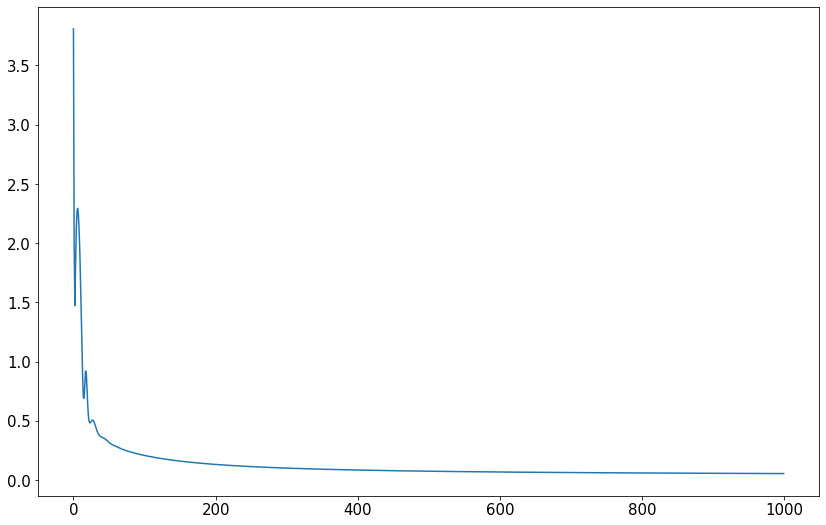

In [34]:
plt.plot(hist_cost)
plt.show()

### 매개변수 확인

In [35]:
w.numpy()

array([[ 1.0184472,  0.5154749, -1.9391685],
       [ 2.9183893, -0.5319281, -4.119553 ],
       [-2.8740616,  0.5052853,  5.3344603],
       [-3.6321847, -1.7537867,  7.0165076]], dtype=float32)

## Prediction

### Prediction Func.

In [72]:
def hxfn( xdata):
    xd = tf.constant( xdata, tf.float32 )
    z = tf.matmul( xd, w ) + b
    hx = tf.nn.softmax( z )
    return hx.numpy()
#    return hx.numpy().argmax(axis=1)
#    return z.numpy(), hx.numpy()

In [40]:
hxfn( [[5.1, 3.5, 1.4, 0.2]])

array([[9.9917775e-01, 8.2228018e-04, 1.5549352e-16]], dtype=float32)

In [ ]:
hxfn( [[5.1, 3.5, 1.4, 0.2]]).argmax(axis=1)

In [41]:
pred = hxfn(x_data).argmax(axis=1)
pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2], dtype=int64)

In [42]:
r = y_data.values.argmax(axis=1)
r

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2], dtype=int64)

## Confusion Matrix

In [62]:
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score
import seaborn as sns

In [46]:
import numpy as np
import pandas as pd
import os

import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

# 관련 라이브러리 임포트 
import matplotlib.font_manager as fm

#  한글글꼴로 변경
# plt.rcParams['font.family'] = '한글글꼴명'
plt.rcParams['font.size'] = 11.0
# plt.rcParams['font.family'] = 'batang'
plt.rcParams['font.family'] = 'Malgun Gothic'

# 그래프에서 마이너스 폰트 깨지는 문제에 대한 대처
matplotlib.rcParams['axes.unicode_minus'] = False

In [57]:
plt.rcParams['figure.figsize'] = [14, 9]
plt.rcParams['xtick.labelsize'] = 15
plt.rcParams['ytick.labelsize'] = 15
plt.rcParams['axes.titlesize'] = 30
plt.rcParams['axes.labelsize'] = 25

In [51]:
hxfn(x_data)

array([[9.99177754e-01, 8.22280999e-04, 1.55493517e-16],
       [9.94917512e-01, 5.08252019e-03, 9.44106311e-15],
       [9.97983217e-01, 2.01673526e-03, 1.84269307e-15],
       [9.94136095e-01, 5.86391194e-03, 2.57550227e-14],
       [9.99387503e-01, 6.12505595e-04, 1.03418355e-16],
       [9.99286234e-01, 7.13838555e-04, 3.78625633e-16],
       [9.98200059e-01, 1.79985561e-03, 3.99620234e-15],
       [9.98289645e-01, 1.71035621e-03, 9.59222038e-16],
       [9.90809321e-01, 9.19065438e-03, 8.33905224e-14],
       [9.95813906e-01, 4.18611011e-03, 3.66255818e-15],
       [9.99502540e-01, 4.97396220e-04, 3.56201309e-17],
       [9.97350693e-01, 2.64928606e-03, 3.93457477e-15],
       [9.95567739e-01, 4.43229685e-03, 4.37809689e-15],
       [9.97927070e-01, 2.07293872e-03, 1.64087847e-15],
       [9.99947548e-01, 5.24438656e-05, 1.12631652e-19],
       [9.99944329e-01, 5.56673804e-05, 8.95157178e-19],
       [9.99815166e-01, 1.84831966e-04, 1.42060511e-17],
       [9.99008000e-01, 9.92029

In [52]:
pred = hxfn(x_data).argmax(axis=1)
pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2], dtype=int64)

In [53]:
r = y_data.values.argmax(axis=1)
r

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2], dtype=int64)

In [54]:
confusion_matrix(r, pred)

array([[50,  0,  0],
       [ 0, 48,  2],
       [ 0,  1, 49]], dtype=int64)

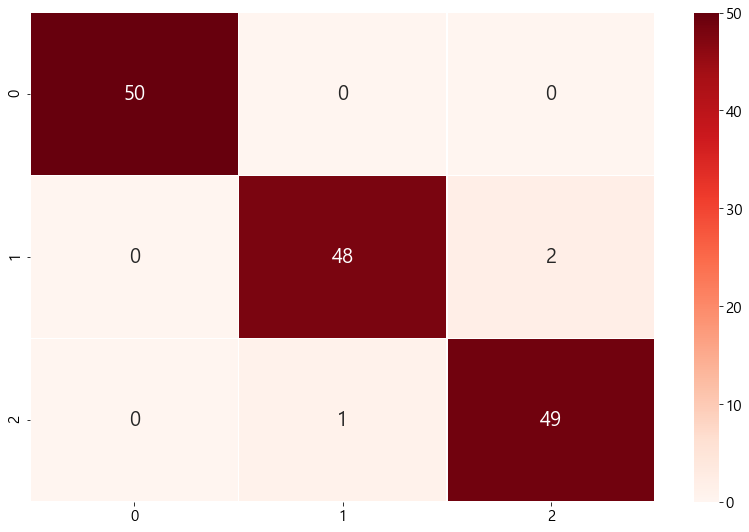

In [58]:
sns.heatmap(confusion_matrix(r, pred),
            annot=True,
            annot_kws={'size': 20},
            cmap='Reds',
            fmt = 'd',                             # 지수로 안나오고 정수로 나오게
            linewidths=0.5
           );

## Accuracy

In [59]:
(pred==r).mean()

0.98

In [60]:
accuracy_score(r, pred)

0.98

## f1 score

In [63]:
f1 = f1_score(r, pred, average='macro')
print(f'F1 스코어: {f1:.4f}')

F1 스코어: 0.9800


# Quiz( Keras version )

## Dense 객체 생성

In [65]:
dense = Dense(units=3, input_dim=x_data.shape[1], activation="softmax")    
model = Sequential( [dense] )
model.compile( loss="categorical_crossentropy", optimizer=Adam(0.1), metrics=['acc'] ) # loss func. 정의
h = model.fit(x_data, y_data, epochs=1000)

Epoch 1/1000
5/5 [==============================] - 0s 998us/step - loss: 2.4430 - acc: 0.2200
Epoch 2/1000
5/5 [==============================] - 0s 748us/step - loss: 1.3152 - acc: 0.3067
Epoch 3/1000
5/5 [==============================] - 0s 743us/step - loss: 0.7833 - acc: 0.4800
Epoch 4/1000
5/5 [==============================] - 0s 998us/step - loss: 0.5644 - acc: 0.7800
Epoch 5/1000
5/5 [==============================] - 0s 748us/step - loss: 0.4587 - acc: 0.9333
Epoch 6/1000
5/5 [==============================] - 0s 748us/step - loss: 0.3799 - acc: 0.9600
Epoch 7/1000
5/5 [==============================] - 0s 997us/step - loss: 0.3560 - acc: 0.9600
Epoch 8/1000
5/5 [==============================] - 0s 998us/step - loss: 0.3264 - acc: 0.9533
Epoch 9/1000
5/5 [==============================] - 0s 748us/step - loss: 0.3032 - acc: 0.9600
Epoch 10/1000
5/5 [==============================] - 0s 748us/step - loss: 0.2975 - acc: 0.9667
Epoch 11/1000
5/5 [==============================

5/5 [==============================] - 0s 748us/step - loss: 0.0634 - acc: 0.9800
Epoch 171/1000
5/5 [==============================] - 0s 750us/step - loss: 0.0641 - acc: 0.9733
Epoch 172/1000
5/5 [==============================] - 0s 499us/step - loss: 0.0617 - acc: 0.9733
Epoch 173/1000
5/5 [==============================] - 0s 748us/step - loss: 0.0609 - acc: 0.9733
Epoch 174/1000
5/5 [==============================] - 0s 748us/step - loss: 0.0669 - acc: 0.9800
Epoch 175/1000
5/5 [==============================] - 0s 499us/step - loss: 0.0601 - acc: 0.9800
Epoch 176/1000
5/5 [==============================] - 0s 748us/step - loss: 0.0629 - acc: 0.9733
Epoch 177/1000
5/5 [==============================] - 0s 577us/step - loss: 0.0624 - acc: 0.9800
Epoch 178/1000
5/5 [==============================] - 0s 499us/step - loss: 0.0617 - acc: 0.9867
Epoch 179/1000
5/5 [==============================] - 0s 499us/step - loss: 0.0663 - acc: 0.9800
Epoch 180/1000
5/5 [=========================

5/5 [==============================] - 0s 731us/step - loss: 0.0523 - acc: 0.9867
Epoch 339/1000
5/5 [==============================] - 0s 748us/step - loss: 0.0530 - acc: 0.9733
Epoch 340/1000
5/5 [==============================] - 0s 499us/step - loss: 0.0576 - acc: 0.9800
Epoch 341/1000
5/5 [==============================] - 0s 748us/step - loss: 0.0764 - acc: 0.9667
Epoch 342/1000
5/5 [==============================] - 0s 748us/step - loss: 0.0508 - acc: 0.9800
Epoch 343/1000
5/5 [==============================] - 0s 748us/step - loss: 0.0636 - acc: 0.9600
Epoch 344/1000
5/5 [==============================] - 0s 998us/step - loss: 0.0584 - acc: 0.9733
Epoch 345/1000
5/5 [==============================] - 0s 748us/step - loss: 0.0556 - acc: 0.9867
Epoch 346/1000
5/5 [==============================] - 0s 499us/step - loss: 0.0543 - acc: 0.9800
Epoch 347/1000
5/5 [==============================] - 0s 748us/step - loss: 0.0505 - acc: 0.9867
Epoch 348/1000
5/5 [=========================

5/5 [==============================] - 0s 969us/step - loss: 0.0617 - acc: 0.9800
Epoch 507/1000
5/5 [==============================] - 0s 1ms/step - loss: 0.0768 - acc: 0.9667
Epoch 508/1000
5/5 [==============================] - 0s 627us/step - loss: 0.0934 - acc: 0.9533
Epoch 509/1000
5/5 [==============================] - 0s 336us/step - loss: 0.0468 - acc: 0.9867
Epoch 510/1000
5/5 [==============================] - 0s 332us/step - loss: 0.0493 - acc: 0.9733
Epoch 511/1000
5/5 [==============================] - 0s 353us/step - loss: 0.0512 - acc: 0.9867
Epoch 512/1000
5/5 [==============================] - 0s 352us/step - loss: 0.0454 - acc: 0.9800
Epoch 513/1000
5/5 [==============================] - 0s 441us/step - loss: 0.0466 - acc: 0.9800
Epoch 514/1000
5/5 [==============================] - 0s 354us/step - loss: 0.0472 - acc: 0.9800
Epoch 515/1000
5/5 [==============================] - 0s 355us/step - loss: 0.0452 - acc: 0.9800
Epoch 516/1000
5/5 [===========================

5/5 [==============================] - 0s 748us/step - loss: 0.0732 - acc: 0.9733
Epoch 675/1000
5/5 [==============================] - 0s 499us/step - loss: 0.0568 - acc: 0.9800
Epoch 676/1000
5/5 [==============================] - 0s 499us/step - loss: 0.0526 - acc: 0.9867
Epoch 677/1000
5/5 [==============================] - 0s 499us/step - loss: 0.0564 - acc: 0.9800
Epoch 678/1000
5/5 [==============================] - 0s 498us/step - loss: 0.0787 - acc: 0.9667
Epoch 679/1000
5/5 [==============================] - 0s 748us/step - loss: 0.0452 - acc: 0.9867
Epoch 680/1000
5/5 [==============================] - 0s 748us/step - loss: 0.0506 - acc: 0.9800
Epoch 681/1000
5/5 [==============================] - 0s 748us/step - loss: 0.0655 - acc: 0.9667
Epoch 682/1000
5/5 [==============================] - 0s 748us/step - loss: 0.0517 - acc: 0.9667
Epoch 683/1000
5/5 [==============================] - 0s 748us/step - loss: 0.0491 - acc: 0.9733
Epoch 684/1000
5/5 [=========================

5/5 [==============================] - 0s 965us/step - loss: 0.0432 - acc: 0.9867
Epoch 843/1000
5/5 [==============================] - 0s 877us/step - loss: 0.0459 - acc: 0.9800
Epoch 844/1000
5/5 [==============================] - 0s 341us/step - loss: 0.0425 - acc: 0.9800
Epoch 845/1000
5/5 [==============================] - 0s 346us/step - loss: 0.0456 - acc: 0.9800
Epoch 846/1000
5/5 [==============================] - 0s 328us/step - loss: 0.0505 - acc: 0.9733
Epoch 847/1000
5/5 [==============================] - 0s 649us/step - loss: 0.0562 - acc: 0.9667
Epoch 848/1000
5/5 [==============================] - 0s 445us/step - loss: 0.0437 - acc: 0.9800
Epoch 849/1000
5/5 [==============================] - 0s 337us/step - loss: 0.0677 - acc: 0.9800
Epoch 850/1000
5/5 [==============================] - 0s 353us/step - loss: 0.0545 - acc: 0.9733
Epoch 851/1000
5/5 [==============================] - 0s 390us/step - loss: 0.0396 - acc: 0.9800
Epoch 852/1000
5/5 [=========================

### Loss 시각화

In [66]:
plt.rcParams['figure.figsize'] = [14, 9]
plt.rcParams['xtick.labelsize'] = 15
plt.rcParams['ytick.labelsize'] = 15
plt.rcParams['axes.titlesize'] = 30
plt.rcParams['axes.labelsize'] = 25

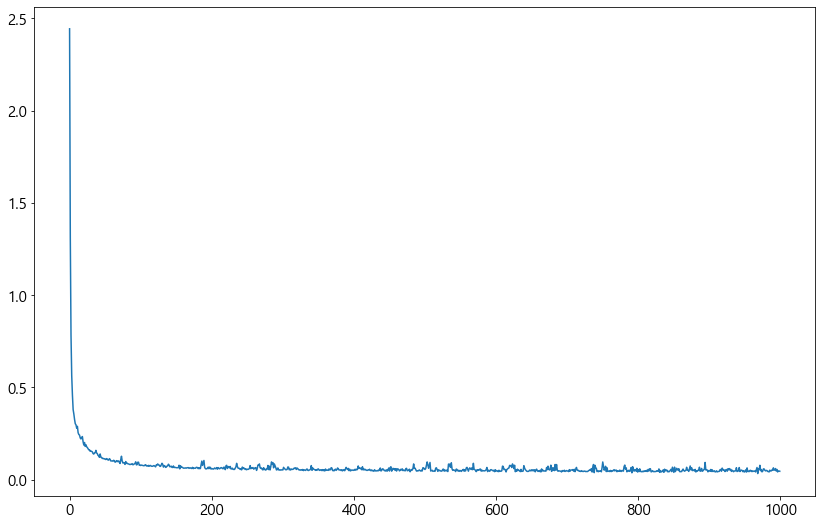

In [67]:
plt.plot(h.history['loss'])
plt.show()

## 매개변수 확인

In [68]:
w,b = dense.get_weights()

In [69]:
w

array([[ 2.3103476,  1.0704944, -1.9521586],
       [ 6.251333 ,  0.6153795, -4.7822876],
       [-6.436583 , -1.3076032,  6.4168096],
       [-9.429701 , -3.6652858,  9.975778 ]], dtype=float32)

In [70]:
b

array([  5.9724817,  10.684457 , -15.056532 ], dtype=float32)

## Prediction

In [75]:
model.predict( [[5.1, 3.5, 1.4, 0.2]] ).argmax( axis=1)

array([0], dtype=int64)

## Confusion Matrix

In [80]:
confusion_matrix(y_data.values.argmax(axis=1), model.predict(x_data).argmax( axis=1))

array([[50,  0,  0],
       [ 0, 47,  3],
       [ 0,  1, 49]], dtype=int64)

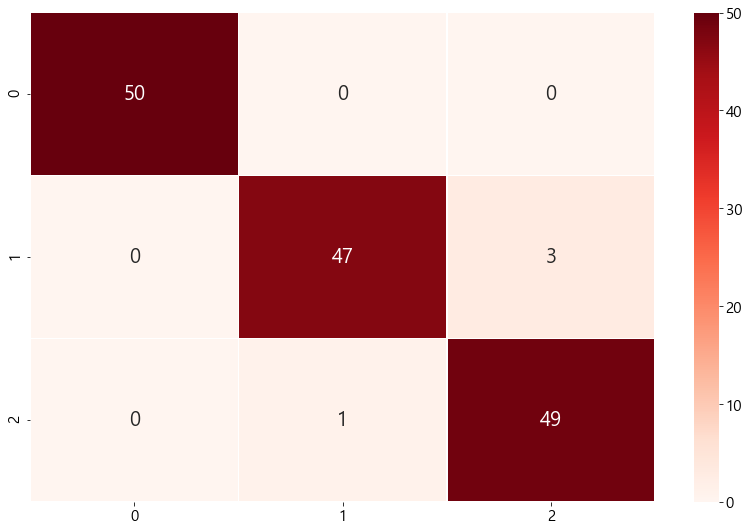

In [81]:
sns.heatmap(confusion_matrix(y_data.values.argmax(axis=1), model.predict(x_data).argmax( axis=1)),
            annot=True,
            annot_kws={'size': 20},
            cmap='Reds',
            fmt = 'd',                             # 지수로 안나오고 정수로 나오게
            linewidths=0.5
           );

## Accuracy

In [82]:
accuracy_score(y_data.values.argmax(axis=1), model.predict(x_data).argmax( axis=1))

0.9733333333333334

## f1 score

In [83]:
f1 = f1_score(y_data.values.argmax(axis=1), model.predict(x_data).argmax( axis=1), average='macro')
print(f'F1 스코어: {f1:.4f}')

F1 스코어: 0.9733
